# Setting up the logistic regression model.

In [1]:
import numpy as np

#generate some data
#number of samples
N = 100
#dimensionality
D = 2
X = np.random.randn(N,D)
X[:50, :] = X[:50,:] - 2*np.ones((50,D))
X[50:, :] = X[50:,:] + 2*np.ones((50,D))

#generate some labels (i.e. target variable)
T = np.array([0]*50 + [1]*50)

#adding bias (intercept) term
ones = np.array([[1]*N]).T
Xb = np.concatenate((ones, X), axis=1)

#randomly initialize weight vector
w = np.random.randn(D + 1)

#model output
z = Xb.dot(w)

#add applying the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))
Y = sigmoid(z)

# Defining cross-entropy error function

In [2]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

170.67907106741808


Now using the closed form solution for logistic regression.  This applies here because the assumptions are met:
* each class is gaussian distributed
* the covariance is equal for each class

And so the weights depend only on the means

In [3]:
#result from closed form:
w = np.array([0, 4, 4])

z = Xb.dot(w)
Y = sigmoid(z)

print(cross_entropy(T, Y))

0.08770080685935916


# Visualizing Results

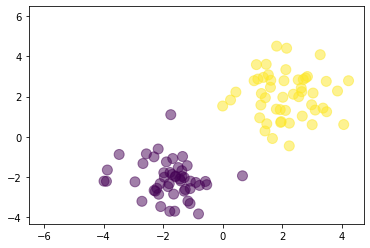

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, -6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

# Updating weights by gradient descent

In [20]:
#randomly initialize weight vector
w = np.random.randn(D + 1)

learning_rate = 0.1
print(cross_entropy(T, Y))
#100 iterations of gradient descent
for i in range(100):
    #print cross entropy error every 10 steps
    if i % 10 == 0:
        print(cross_entropy(T, Y))
    w += learning_rate * np.dot((T-Y).T, Xb)
    Y = sigmoid(Xb.dot(w))

print('Final w:', w)


0.036595294282999416
0.036595294282999416
2.2732502283356023e-05
2.2729787782868194e-05
2.2727073930883738e-05
2.2724360726514456e-05
2.272164817031546e-05
2.2718936261398554e-05
2.2716224999985776e-05
2.2713514385410976e-05
2.2710804417785168e-05
Final w: [-0.31032258 17.90971009 18.86007136]
